In [1]:
%matplotlib inline
# version check
import numpy
print('The numpy version is {}.'.format(numpy.__version__))
import pandas
print('The pandas version is {}.'.format(pandas.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib
print('The matplotlib version is {}.'.format(matplotlib.__version__))
import regex
print('The regex version is {}.'.format(regex.__version__))
import scipy
print('The scipy version is {}.'.format(scipy.__version__))

The numpy version is 1.18.1.
The pandas version is 1.0.4.
The scikit-learn version is 0.23.1.
The matplotlib version is 3.2.1.
The regex version is 2.5.80.
The scipy version is 1.4.1.


In [2]:
# set random state for reproducibility
random_state = 42

# default numpy settings
import numpy as np
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
import numpy as np
np.set_printoptions(edgeitems=15, linewidth=150, 
    formatter=dict(float=lambda x: "%.2f" % x))

# update pandas settings
import pandas as pd
pd.set_option('max_colwidth', 50)
pd.options.display.max_columns = 25
pd.options.display.max_rows = 150
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# system
import sys
#sys.getsizeof

# timeit
import timeit

In [3]:
# plotting functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("notebook")

def plot_ecdf(x, xlab='', ylab='', title='', xlim=None, ylim=None, logx=False, logy=False, hline=None, vline=None):
    x = np.sort(x)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x, y)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

    def plot_scatter(x, y, xlab='', ylab='', title='', logx=False, logy=False, hline=None, vline=None):
        plt.scatter(x, y, alpha=0.25)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.title(title)
        if logx == True:
            plt.xscale('log')
        if logy == True:
            plt.yscale('log')
        if hline is not None:
            plt.axhline(hline, color='r', linestyle='--')
        if vline is not None:
            plt.axvline(vline, color='r', linestyle='--')

    def plot_2_2(x, y, suptitle='', hline=None, vline=None):
        plt.figure(figsize=(10,10))
        
        plt.subplot(2, 2, 1)
        plot_scatter(x, y, xlab='', ylab='', title='Plot 1: linx, liny', logx=False, logy=False, hline=None, vline=None)
        plt.subplot(2, 2, 2)
        plot_scatter(x, y, xlab='', ylab='', title='Plot 2: linx, logy', logx=False, logy=True, hline=None, vline=None)
        plt.subplot(2, 2, 3)
        plot_scatter(x, y, xlab='', ylab='', title='Plot 3: linx, liny', logx=True, logy=False, hline=None, vline=None)
        plt.subplot(2, 2, 4)
        plot_scatter(x, y, xlab='', ylab='', title='Plot 4: linx, logy', logx=True, logy=True, hline=None, vline=None)
        
        plt.suptitle(suptitle, fontsize=16)
        plt.show() 

def plot_2_4(_, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(20,10))

    plt.subplot(2, 4, 1)
    _.plot(kind='hist', bins=30, title='Plot 1: linx, liny', logx=False, logy=False)
    plt.subplot(2, 4, 2)
    _.plot(kind='hist', bins=30, title='Plot 2: linx, logy', logx=False, logy=True)
    plt.subplot(2, 4, 3)
    plot_ecdf(_, xlab='', ylab='', title='Plot 3: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 4)
    plot_ecdf(_, xlab='', ylab='', title='Plot 4: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 4, 5)
    _.plot(kind='hist', bins=30, title='Plot 5: logx, liny', logx=True, logy=False)
    plt.subplot(2, 4, 6)
    _.plot(kind='hist', bins=30, title='Plot 6: logx, logy', logx=True, logy=True)
    plt.subplot(2, 4, 7)
    plot_ecdf(_, xlab='', ylab='', title='Plot 7: logx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 8)
    plot_ecdf(_, xlab='', ylab='', title='Plot 8: logx, logy', logx=True, logy=True, hline=None, vline=None)
    plt.suptitle(suptitle, fontsize=16)
    plt.show()   

    
def plot_sender_stats(df, n, suptitle=''):
    plt.figure(figsize=(14, 12))
    plt.subplot(2, 2, 1) # plot 1: horizontal bar
    _ = pd.DataFrame(df.groupby(['m_from']).size()).sort_values(0,ascending=False).reset_index() # convert data
    l = np.array(_.iloc[:,0]) # labels
    v = np.array(_.iloc[:,1]) # values
    plt.barh(np.linspace(n,1,n), v[:n], tick_label=l[:n])
    plt.subplot(2, 2, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(2, 2, 3) # plot 3: pie
    pie_x = [len(df[df.gender == 0].m_from.unique()), len(df[df.gender == 1].m_from.unique())]
    pie_lab = ['boy: %d email addresses' % (pie_x[0]), 'girl: %d email addresses' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(2, 2, 4) # plot 4: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.suptitle(suptitle)
    plt.show()
    print(_.describe())
    print(stats.describe(v))
    
def plot_character_frequency(df, suptitle=''):
    v = np.array(df.n_characters_start.values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [df[df.gender == 0].n_characters_start.sum(),df[df.gender == 1].n_characters_start.sum()]
    pie_lab = ['boy: %e characters' % (pie_x[0]), 'girl: %e characters' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.show()
    print(df.n_characters_start.describe())
    print(stats.describe(v))
    

def plot_2x2(x, y=None):
    plot_2_2(X, suptitle='', hline=None, vline=None)
    print(X.describe())
    
    
def plot_2x4(X, y=None):    
    plot_2_4(X, suptitle='', hline=None, vline=None)
    print(X.describe())

# VISUALIZE COLLECTED DATA
Here we're going to explore the data (EDA) and visualize different attributes of the data in preparation for cleaning.
    
## Import dataframe

In [4]:
df = pd.read_csv('./data/enron/collect_genders.csv', index_col=0)

In [5]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender
0,./data/enron/maildir/allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,0.00
1,./data/enron/maildir/allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,0.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517401 entries, 0 to 517400
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   f_dir      517401 non-null  object 
 1   m_id       517401 non-null  object 
 2   m_date     517401 non-null  object 
 3   m_from     517401 non-null  object 
 4   m_to       496355 non-null  object 
 5   m_cc       135166 non-null  object 
 6   m_bcc      127886 non-null  object 
 7   m_subj     498214 non-null  object 
 8   mime_vers  517401 non-null  float64
 9   cont_type  517401 non-null  object 
 10  encode     517401 non-null  object 
 11  x_from     517401 non-null  object 
 12  x_to       508255 non-null  object 
 13  x_cc       128886 non-null  object 
 14  x_bcc      175 non-null     object 
 15  x_fold     517401 non-null  object 
 16  x_orig     517401 non-null  object 
 17  x_fname    517401 non-null  object 
 18  o_body     517401 non-null  object 
 19  m_body     517401 non-n

## Gender

Gender ratio by Number of emails


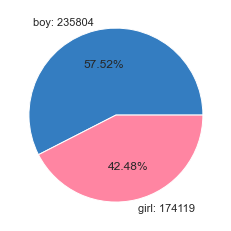

In [7]:
#vf = df[df.gender.notna()].copy()
pie_x = df.groupby(['gender']).size()
pie_lab = ['boy: %d' % (pie_x[0]), 'girl: %d' % (pie_x[1])]
plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
print('Gender ratio by Number of emails')
plt.show()

## Emails sent by email address
Reviewing the frequency of emails sent by email address can provide insight on one dimension of skew related to our __Feature variables__. Though our post-processed words will be our __feature variables,__ the frequency of senders can introduce bias to the features.

In [8]:
%%time
_ = df.groupby(['m_from']).size()
_.name='n_emails_sent'
df = df.merge(_, on='m_from')

Wall time: 929 ms


In [9]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent
0,./data/enron/maildir/allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,0.00,2195
1,./data/enron/maildir/allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,0.00,2195


Emails Sent by Email Address


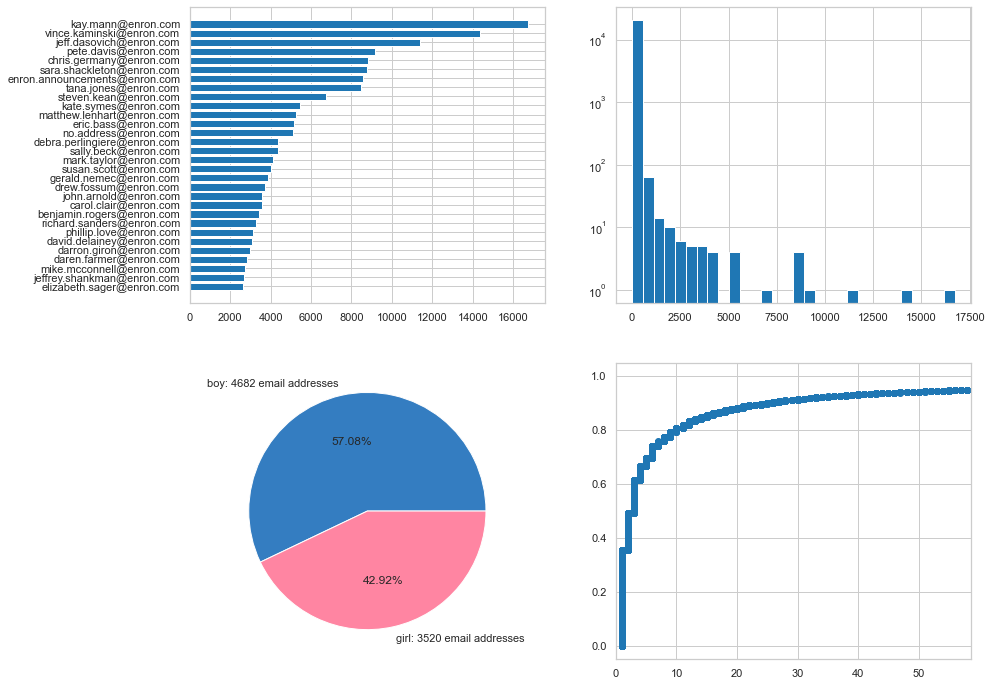

             0
count 20328.00
mean     25.45
std     271.66
min       1.00
25%       1.00
50%       3.00
75%       7.00
max   16735.00
DescribeResult(nobs=20328, minmax=(1, 16735), mean=25.45262691853601, variance=73798.16384019886, skewness=34.86152374880215, kurtosis=1571.531706077674)


In [10]:
print('Emails Sent by Email Address')
plot_sender_stats(df, 30)

> Above we have a bar plot, histogram, ecdf,  for ___the number of emails sent by email address.___
> 
> Our standard deviation is >10x the mean, suggesting the presence of significant outliers. A skewness of ~35 confirms the histogram's __right skew__, when the mass of the distribution is concentrated on the left with a longer right tail.
> 
> Regarding our population, 80% of email addresses have sent 10 or less emails - at 95% that number moves to ~60. Since our max number of emails sent is _16735_, it'll be important we keep an eye on our Target Variable distribution later so we're aware of any ___imbalanced target data___.

## Email length
Another attribute of interest will be __email length__. Depending on the size of emails, we can isolate emails for filtering criteria from the outlier length.    

Let's begin by appending the starting character counts of each email to the dataframe. Character counts are less computationally expensive - while still providing a measure for length.

In [11]:
%%time
A = np.array(df.loc[:, 'm_body']) 
getlength = np.vectorize(len)
df['n_characters_start'] = getlength(A)
df.head(2)

Wall time: 76 ms


,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent,n_characters_start
0,./data/enron/maildir/allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,0.00,2195,23
1,./data/enron/maildir/allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,0.00,2195,786


Emails Sent by Character Count


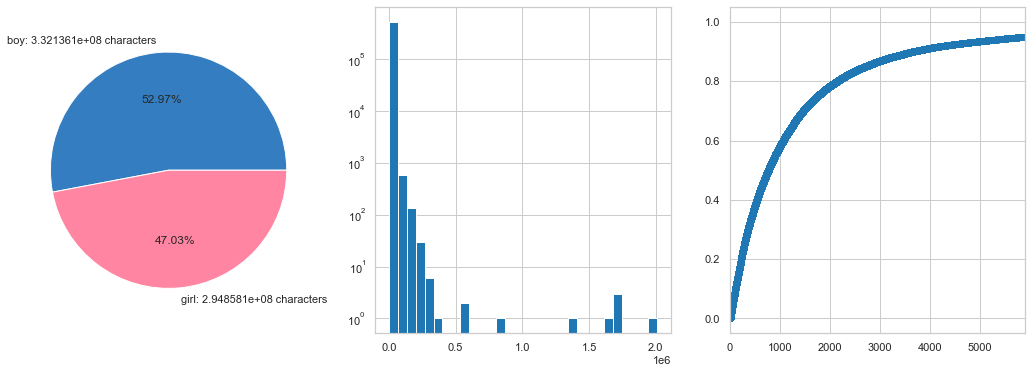

count    517401.00
mean       1845.35
std        8181.16
min           1.00
25%         288.00
50%         770.00
75%        1756.00
max     2011422.00
Name: n_characters_start, dtype: float64
DescribeResult(nobs=517401, minmax=(1, 2011422), mean=1845.351876011063, variance=66931451.043753594, skewness=113.4710740345046, kurtosis=22607.70663748034)


In [12]:
print('Emails Sent by Character Count')
plot_character_frequency(df)

> With the average word measuring ~5 characters, our largest email __has an average of over 400,000 words!__ It's highly unlikely it represents valuable data for our observations.
> 
> Exploring the email length outliers will allow us to better filter our data prior to preprocessing.
> 
> _Let's peek and print the first 10,000 characters._

In [13]:
print(df.loc[df.query('n_characters_start > 2000000').index[0],'o_body'][:10000])

Message-ID: <24675364.1075840403182.JavaMail.evans@thyme>
Date: Fri, 1 Feb 2002 09:16:11 -0800 (PST)
From: postmaster@blakes.com
To: chris.dorland@enron.com
Subject: Returned Mail: Error During Delivery
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: postmaster@blakes.com@ENRON
X-To: Dorland, Chris </O=ENRON/OU=NA/CN=RECIPIENTS/CN=CDORLAN>
X-cc: 
X-bcc: 
X-Folder: \ExMerge - Dorland, Chris\Deleted Items
X-Origin: DORLAND-C
X-FileName: chris dorland 6-26-02.PST

------ Here is your List of Failed Recipients ------
<phillip.laflaire@blakes.com>


Requested action not taken: mailbox unavailable. [SMTP Error Code 550]

-------- Here Is Your Returned Mail --------
Received: FROM postmaster.enron.com BY bcginet1.blakes.com ; Fri Feb 01 12:13:37 2002 -0500
Received: from nahou-msmsw01p.corp.enron.com (nahou-msmsw01p.corp.enron.com [192.168.110.108])
	by postmaster.enron.com (8.10.1/8.10.1/external_corp-1.08) with ESMTP id g11HEe029758
	for 

> As we suspected, probably not the best for our analysis.
>
> However, we can observe attributes of emails that should be filtered out like:
>- Spam email senders;
>- Spam 'word' patterns (i.e. emails having words larger than X characters, or 'words' with repeating characters like '****************');
>- etc;

In [14]:
#df.to_csv('data/enron/visualize_initial_data.csv')

In [15]:
df.head()

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent,n_characters_start
0,./data/enron/maildir/allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,0.00,2195,23
1,./data/enron/maildir/allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst\n\n,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,0.00,2195,786
2,./data/enron/maildir/allen-p/_sent_mail/100,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf\n\n,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,0.00,2195,30
3,./data/enron/maildir/allen-p/_sent_mail/1000,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf\n\n,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy,\n\n Can you send me a schedule of the s...",0.00,2195,187
4,./data/enron/maildir/allen-p/_sent_mail/1001,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,1.00,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf\n\n,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,0.00,2195,35
